In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets, metrics, model_selection as skms, linear_model
)

In [4]:
dataset = datasets.load_diabetes()

In [5]:
model = linear_model.LinearRegression()

In [6]:
# shuffle split
ss = skms.ShuffleSplit(test_size=0.25)
scores = skms.cross_val_score(model, dataset.data, dataset.target, cv=ss, scoring="neg_mean_squared_error")
scores = pd.Series(np.sqrt(-scores))
df = pd.DataFrame({"RMSE": scores})
df.index.name = "Repeat"
df.T

Repeat,0,1,2,3,4,5,6,7,8,9
RMSE,57.652184,53.516893,49.746739,56.409268,61.058175,56.698312,54.535504,56.177124,56.585064,54.340491


In [7]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
RMSE,10.0,55.671975,2.952127,49.746739,54.389244,56.293196,56.67,61.058175


Text(0.5, 17.722222222222214, 'Over repeated train test splits')

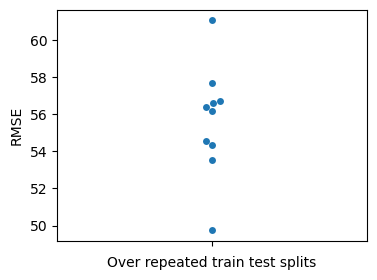

In [8]:
ax = plt.figure(figsize=(4, 3)).gca()
ax = sns.swarmplot(y="RMSE", data=df, ax=ax)
ax.set_xlabel("Over repeated train test splits")

In [19]:
# using ShuffleSplit() with random state
ss = skms.ShuffleSplit(test_size=0.25, random_state=42)
train, test = 0, 1
next(ss.split(dataset.data))[train][:10]

array([ 16, 408, 432, 316,   3,  18, 355,  60, 398, 124])

In [25]:
# using KFold()
kf = skms.KFold(5)
next(kf.split(dataset.data))[train][:10]

array([89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [41]:
# using the pet targets to show how shuffling works in KFold()
pet = np.array(["cat", "dog", "cat", "dog", "dog", "dog"])
kf = skms.KFold(3, shuffle=True)
train, test = 0, 1
split_group1 = next(kf.split(pet))[train]
split_group2 = next(kf.split(pet))[train]
split_group1, split_group2

(array([0, 1, 3, 5]), array([1, 2, 4, 5]))